<div class="alert alert-block alert-info blue">
<b>In the following questions we will be working on 3 datasets related to Olympic Games </b>

1. *athletes.txt* contains biographic information of athletes (e.g. the name and sex)
2. *games.tsv* contains basic information about of the Olympic Games (e.g. the location and opening
    dates)
3. *results.csv* contains information about individual results of athletes in the Olympic Games since
    2012
</div>

## 
<div class="alert alert-block alert-warning">
<b>Exercise: 1</b> 
</div>

In [1]:
# Importing Packages required 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import requests
from datetime import datetime

# to avoid deprecation warning in our notebook

warnings.filterwarnings("ignore")

### Reading data from the given datasets in Pandas Dataframe

In [2]:
#Athelete File CSV
athletes_df = pd.read_csv('athletes.txt', delimiter=';', index_col=0)

#Converting the data type of index to int for proper representation of index field
athletes_df.index = athletes_df.index.astype(int)


<div class="alert alert-block alert-info">
<b>Analysis: </b> Athlete Dataframe
   
* The athlete_df has some columns which have more than one information and must be separated in different columns. For example : name, born, died and measurements.
* A tidy dataset has a single variable for each information, thus we need to generate separate columns.
</div>

In [3]:
# Enriching the Athlete Dataframe Columns

athletes_df[['first_name','last_name']] = athletes_df['name'].str.split('•', expand=True, n= 1)
athletes_df[['date_of_birth','place_of_birth']] = athletes_df['born'].str.split('in', expand=True, n=1)
athletes_df[['date_of_death','place_of_death']] = athletes_df['died'].str.split('in', expand=True, n=1)
athletes_df[['height','weight']] = athletes_df['measurements'].str.split('/', n = 1, expand = True)


# Dropping the columns which we don't require:

athletes_df.drop('name', inplace=True, axis = 1)
athletes_df.drop('born', inplace=True, axis = 1)
athletes_df.drop('died', inplace=True, axis = 1)
athletes_df.drop('measurements', inplace=True, axis = 1)

In [4]:
# Games File reading
games_df = pd.read_csv('games.tsv',delimiter='\t')

# Reading results1 File 
results_df = pd.read_csv('results1.csv') 



<div class="alert alert-block alert-success">
<b>1.1 What is the name of the most successful athlete since 2012, as measured by the number of gold medals? </b> 
</div>

In [5]:
# Only fetching data of gold medals athletes
results_gold_2012 = results_df[(results_df['medal'] == 'Gold') & (results_df['year']>=2012)]
results_gold_2012[['athlete','medal']]

medal_counter = results_gold_2012.groupby('athlete')['medal'].count()

# extracting id of the most succesful athlete and number of medals won
most_successful_athlete_id = medal_counter.sort_values(ascending=False).head(1).index.values[0]
number_of_golds = medal_counter.sort_values(ascending=False).head(1).values[0]

# Fetching Name of the athlete on the basis of id
first_name = athletes_df._get_value(most_successful_athlete_id, 'first_name')
last_name = athletes_df._get_value(most_successful_athlete_id, 'last_name')


print(f"The most successful athlete is {first_name +' '+ last_name} with total {number_of_golds} medals since 2012")

The most successful athlete is Michael Phelps with total 9 medals since 2012



<div class="alert alert-block alert-success">
<b>1.2  How many different athletes have participates in the Olympic Games since 2012? </b> 
</div>

In [6]:
# To fetch number of participants from athlete id in results dataframe

number_of_participants = len(results_df['athlete'].unique())

print(f"Total number of different participants are {number_of_participants}")

Total number of different participants are 29655


<div class="alert alert-block alert-success">
<b>1.3 What are the 10 countries with the lowest ratio of female participants? Represent this information
using a bar chart. </b> 
</div>

<div class="alert alert-block alert-info">
<b>Merging In Pandas</b> 

Since we need to find the female athlete ratio we need to merge results_df in which the athletes who had participated since 2012 is shown and athlete dataframe in which the sex of the athlete is present 
</div>

In [7]:
athlete_result_inner_merge = pd.merge(left=athletes_df, right=results_df, how='inner', on='athlete')

# Total female candidates
female_total = athlete_result_inner_merge[athlete_result_inner_merge['sex']=='Female'].groupby(['athlete','country'])['athlete'].count()
female_total_final = female_total.groupby('country').count()

# Candidates both male and female, since one athlete can appear multiple times due to different year of olympics
total_candidates = athlete_result_inner_merge.groupby(['athlete', 'country'])['athlete'].count()
total_candidates_final = total_candidates.groupby('country').count()

ratio_of_female = round((female_total_final/total_candidates_final), 4)

#Since individual olympic athlete are the athletes from kuwait thus replacing it:
ratio_of_female['Kuwait'] = ratio_of_female.get('Individual Olympic Athletes')

#Delteing entry for individual olympic athletes
ratio_of_female.__delitem__('Individual Olympic Athletes')

# To fetch 10 lowest female ratio countries we will sort the value
lowest_10_female_ratio = ratio_of_female.sort_values().head(10)

print(f"Lowest 10 Female Ratio countries are {lowest_10_female_ratio}")


Lowest 10 Female Ratio countries are country
Honduras                   0.0857
Iraq                       0.1034
Kingdom of Saudi Arabia    0.1071
Qatar                      0.1273
United Arab Emirates       0.1282
Kuwait                     0.1429
Gabon                      0.1481
Afghanistan                0.1538
Nauru                      0.1667
Monaco                     0.1667
Name: athlete, dtype: float64


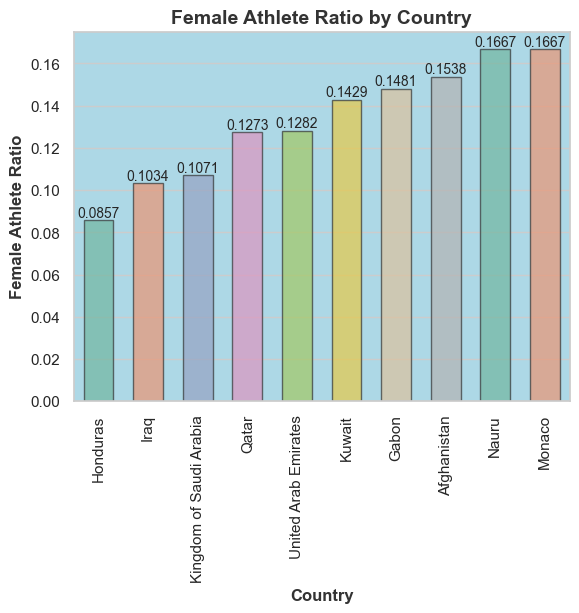

In [8]:
# using seaborn library to form a bar chart 

# setting style of figure plot
sns.set(style="whitegrid") 
sns.despine(left=True, top=True)

female_ratio_barplot = sns.barplot(x=lowest_10_female_ratio.index, y=lowest_10_female_ratio.values,palette='Set2',width=0.6, 
                                   edgecolor='0.2', alpha=0.7)

# setting labels and title
plt.xlabel("Country", fontsize=12, fontweight='bold', color='0.2')
plt.ylabel("Female Athlete Ratio",  fontsize=12, fontweight='bold', color='0.2')
plt.title("Female Athlete Ratio by Country",  fontsize=14, fontweight='bold', color='0.2')

# setting style of bar plot
female_ratio_barplot.set_xticklabels(female_ratio_barplot.get_xticklabels(), rotation=90)
female_ratio_barplot.bar_label(female_ratio_barplot.containers[0], fontsize=10)
female_ratio_barplot.set_facecolor('lightblue')
plt.show()

<div class="alert alert-block alert-warning">
<b>Exercise 2 </b> 
</div>

<div class="alert alert-block alert-success">
<b>2.1  What are the three most common firstnames of female athletes from the country ‘Republic of
Korea’? </b> 
</div>

In [9]:
# Using the merged dataframe of athlete and result 
korea_female_athlete = athlete_result_inner_merge[(athlete_result_inner_merge['sex'] == 'Female') & (athlete_result_inner_merge['country'] == 'Republic of Korea')]['first_name']
top3_korean_female_names = korea_female_athlete.value_counts().head(3).index.values

print(f"Top 3 most common first names of Korea's Female Athlete in highest to lowest order are {top3_korean_female_names[0]}, {top3_korean_female_names[1]} and {top3_korean_female_names[2]}")


Top 3 most common first names of Korea's Female Athlete in highest to lowest order are Kim, Lee and Park


<div class="alert alert-block alert-success">
<b>2.2 Who is the tallest female athlete? Provide the name, height, country and sport. </b> 
</div>

In [10]:
# Checking the height column for female athlete
female_heights = athlete_result_inner_merge[(athlete_result_inner_merge['height'].notna()) & (athlete_result_inner_merge['sex'] == 'Female')]
female_heights['height'].sort_values() 
# => resulting in unsual result as it contains weight data also 

# We observed that weight value has been present in height column, but that we doesn't require for height calculation,
# therefore we will drop the values which contains weight in them 
female_heights.drop(female_heights[female_heights['height'].str.contains('kg')].index, inplace=True)

# Now performing sorting again 
tallest_female_athlete = female_heights.sort_values('height', ascending=False).head(1)
tallest_female_athlete_name = tallest_female_athlete.first_name.values[0] +' '+ tallest_female_athlete.last_name.values[0]
tallest_female_athlete_height = tallest_female_athlete.height.values[0]
tallest_female_athlete_country = tallest_female_athlete.country.values[0]

print(f'Tallest Female Details are as follows:\nName: {tallest_female_athlete_name}\nHeight: {tallest_female_athlete_height}\nCountry: {tallest_female_athlete_country}')


Tallest Female Details are as follows:
Name: Wei Wei
Height: 206 cm 
Country: People's Republic of China


<div class="alert alert-block alert-success">
<b>2.3 What are the 10 sports with the highest average weight of participants? Provide the sport and the
weight. </b> 
</div>

In [11]:
df_weight_sports = pd.merge(left = athletes_df, right = results_df, how='inner', on='athlete')

# taking unique athletes only for height, weight and sport
df_weight_sports_unique = df_weight_sports.drop_duplicates(subset='athlete')[['athlete', 'sport', 'height', 'weight']]

# the height column contains weight as well so we will collect those indexes:
indexes_of_height = df_weight_sports_unique[(df_weight_sports_unique['height'].str.contains('kg')) & (df_weight_sports_unique['height'].notna())].index

#collecting weight from height cols
weight_from_height = df_weight_sports_unique[(df_weight_sports_unique['height'].str.contains('kg')) & (df_weight_sports_unique['height'].notna())]['height']

# equating all those values from height col to weight col in their indices
df_weight_sports_unique.loc[indexes_of_height.values,'weight'] = weight_from_height.values

# dropping all those values which are nan
df_weight_sports_unique['weight'].dropna(inplace=True)

#droppping on the basis of string check 
df_weight_sports_unique = df_weight_sports_unique[(df_weight_sports_unique["weight"].str.contains("NaN") == False) | (df_weight_sports_unique["weight"].str.contains("0") == False)] 

<div class="alert alert-block alert-info">
<b>Analysis: </b> 

Weight Column

on observing the data frame for weight we saw that weight col contains some comma separated values and some dash separated value, therefore for these observations we take the average of weight of that range
</div>

In [12]:
def replace_dash_with_average(range_str):
    """This function check for dash separated value in weight column and average it out
        Args:
        range_str: values from weight col

    Returns:
        float: average of those numbers
    """
    if isinstance(range_str, str):
            if len(range_str.split('-')) == 2:
                start, end = map(str, range_str.split('-'))
                #split end as well for taking only numeric and not kg
                end = end.split(' ')[0]
                average = (int(start) + int(end)) / 2
            else:
                average = range_str
    else:
         average = range_str
         
    return average

In [13]:
def replace_comma_with_average(range_str):
    """This function check the comma separated values in weight and average it out for the sake of calculation

    Args:
        range_str : value from weight col

    Returns:
        float: average of comma separated values
    """
    if isinstance(range_str, str):
            if len(range_str.split(',')) == 2:
                start, end = map(str, range_str.split(','))
                end = end.split(' ')[1]
                average = (int(start) + int(end)) / 2
            else:
                average = range_str
    else:
         average = range_str
    return average

In [14]:
# Applying the formula for calculating average weight
df_weight_sports_unique['weight'] = df_weight_sports_unique['weight'].apply(replace_comma_with_average).astype(str)
df_weight_sports_unique['weight'] = df_weight_sports_unique['weight'].apply(replace_dash_with_average).astype(str)

In [15]:
# creating a function for fetching only value and not units

def extract_values(value_with_unit: str) -> float:
    """This function extracts only value part from string of unit

    Args:
        value_with_unit (str): data with both numeric and string part(here units like cm and kg)

    Returns:
        float: value with only floating numeric part and not the unit part(here units liks cm and kg)
    """
    try:
        # Split the string by space and take the first part (the numeric part)
        numeric_part = value_with_unit.split()[0]
        return float(numeric_part)
    except:
        return 0.0


In [16]:
#converting the weight value from kg to weight 
df_weight_sports_unique['weight'] = df_weight_sports_unique['weight'].apply(extract_values)

# since it is impossible that an athlete weight will be 0 , so we will not consider those values
df_weight_sports_unique = df_weight_sports_unique[df_weight_sports_unique['weight']  != 0 ]

#Calculating the Mean of the weight per sport using group by method
results_avg_weight_sport = df_weight_sports_unique.groupby('sport')['weight'].agg(np.mean)

top_10_sports = results_avg_weight_sport.sort_values(ascending=False).head(10)
print(f'The top 10 sports with maximum average weight are : {top_10_sports.to_string()}')

The top 10 sports with maximum average weight are : sport
Bobsleigh          91.680505
3x3 Basketball     90.500000
Basketball         87.258964
Baseball           86.666667
Water Polo         85.930070
Handball           83.644588
Ice Hockey         81.109834
Volleyball         80.209709
Luge               79.973856
Rowing             79.716981


<div class="alert alert-block alert-success">
<b>
2.4 What are the 3 sports with the largest number of participants that are severely underweight?
Provide the sport and the number of severely underweight participants. Severe underweight is
defined by a body-mass-index (BMI) smaller than 16, where BMI is calculate as weight/height2
in the unit kg/m2</b> 
</div>

<div class="alert alert-block alert-info">
<b>Analysis: </b> 
df_weight_sports_unique

There are some observations in Height in which there is no value given, and likewise some places in weight in which no value is given thus according to my assumption that if we have a large dataset then dropping some small number of observations will not affect the dataset that much.
</div>

In [17]:
df_weight_sports_unique = df_weight_sports_unique[(df_weight_sports_unique['height'].str.contains('kg') == False) & (df_weight_sports_unique['height'].notna())]

#separate cm from the value
df_weight_sports_unique['height'] = df_weight_sports_unique['height'].apply(extract_values)

# unit conversions
df_weight_sports_unique['height_meter'] = df_weight_sports_unique['height']/100

# creating new column for body mass index by dividing weight to the sqaure of height
df_weight_sports_unique['bmi'] = (df_weight_sports_unique['weight'])/(df_weight_sports_unique['height_meter'] ** 2)

#counting the number of athlete by sport who has bmi level under 16 or are largely underweight 
bmi_count = df_weight_sports_unique[df_weight_sports_unique['bmi'] < 16].groupby('sport')['athlete'].count()

print(f"Top 3 severly underweight games are : {bmi_count.nlargest(3).to_string()}")


Top 3 severly underweight games are : sport
Rhythmic Gymnastics     8
Athletics               7
Figure Skating          3


<div class="alert alert-block alert-warning">
<b>Exercise 3 </b> 
</div>

<div class="alert alert-block alert-success">
<b> 3.1 Who is the oldest athlete? Provide the name and the age. </b> 

<b>We define age as the
number of completed years at the beginning of the Olympic Games at which the athlete participates.
To calculate the age you need to (1) leverage the information about the date of birth and you (2) need
to consider the date when the Olympic Games were opened</b>
</div>

In [18]:
# First merging games dataframe and result dataframe so as to get opening date of games

# Performing one to many 
age_df_merge = pd.merge(left = games_df, right = results_df, on= ['year','season'], how= 'inner', validate='one_to_many')

# Fecthing only useful columns
age_df_merge = age_df_merge[['athlete', 'sport','year','season','games_opened','country','games_country','games_closed']]

# Now performing merge on Athlete Dataframe so as to get the date of birth 
age_df_final = pd.merge(left = age_df_merge, right = athletes_df, on = ['athlete'], how='inner')

# Fetching only relevant columns
age_df_final = age_df_final[['athlete','first_name','last_name','sport','year','season','games_opened','date_of_birth']]


In [19]:
#converting date format of birth date 
def convert_into_datetime(input_date):
    """This function converts the given date in yyyy-mm-dd format

    Args:
        input_date (string): Taking date as input 

    Returns:
        datetime: Date in yyyy-mm-dd format
    """
    return datetime.strptime(input_date, "%Y-%m-%d")

In [20]:
#Converting date of birth 
age_df_final['date_of_birth'] = pd.to_datetime(age_df_final['date_of_birth'], format='mixed').dt.strftime('%Y-%m-%d')
age_df_final['date_of_birth'] = age_df_final['date_of_birth'].apply(convert_into_datetime)

# Dropping all the duplicates of athlete for correct analysis
age_df_final = age_df_final.drop_duplicates(subset='athlete')

# converting date of games opened
age_df_final['games_opened'] = age_df_final['games_opened'].apply(convert_into_datetime)

#creating column for age difference by subtracting date of games opened to date of birth
age_df_final['age_difference'] = age_df_final['games_opened'] - age_df_final['date_of_birth']

In [21]:
def cal_age_difference(age_diff):
    """This function calculate the age of the athlete

    Args:
        age_diff (string): The date values column

    Returns:
        float: return age in years
    """
    age_in_years = age_diff.days // 365
    age_in_months = (age_diff.days % 365) // 30
    age_in_days = (age_diff.days % 365) % 30
    total_years = age_in_years + (age_in_months/12) + (age_in_days/365)
    age_diff = round(total_years, 2)
    return age_diff

In [22]:
# calculating age using function 
age_df_final['age_difference'] = age_df_final['age_difference'].apply(cal_age_difference)

oldest_athlete = age_df_final[['first_name','last_name','age_difference']].sort_values(ascending=False, by='age_difference').head(1)

##Extracting name and age 
name_oldest_athlete = oldest_athlete.iloc[0]['first_name'] +' '+  oldest_athlete.iloc[0]['last_name']
age_oldest_athlete = oldest_athlete.iloc[0]['age_difference']
print(f' Name of the oldest athlete is {name_oldest_athlete} and age is {age_oldest_athlete}')

 Name of the oldest athlete is Hiroshi Hoketsu and age is 71.39


<div class="alert alert-block alert-success">
<b> 3.2  What are the 10 sports with the highest average age of participants? Provide the sport and the
average age. </b> 
</div>

In [23]:
sports_avg_age = age_df_final.groupby('sport')['age_difference'].agg(np.mean)
top_10_highest_avg_age = sports_avg_age.nlargest(10).to_string()
print(f'Top 10 highest average age sport are : {top_10_highest_avg_age}')

Top 10 highest average age sport are : sport
Equestrian Jumping      37.935642
Equestrian Dressage     37.814130
Equestrian Eventing     36.044713
Shooting                30.562671
Baseball                29.957413
Curling                 29.776057
Golf                    29.323650
Beach Volleyball        28.934510
3x3 Basketball          28.912344
Softball                28.802556


<div class="alert alert-block alert-warning">
<b>Exercise 4</b> 
</div>

<div class="alert alert-block alert-success">
<b> 4.1 Calculate the medal table for the Summer Olympic Games 2016 in Rio de Janeiro. See the official medal
table as a reference. Your medal table should have the same structure (same column names and same
sorting) as the official medal table. Display the top 10 countries. </b> 
</div>


### Link for the official Medal Table 2016

[2016 Olympics Medal Table ](https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table#Medal_table)

In [24]:
# Getting information for only year 2016
summer_olympics_2016 = results_df[(results_df['year']== 2016)]

# Removing those data in which medal result is nan
summer_olympics_2016 = summer_olympics_2016[summer_olympics_2016['medal'].notna()]

In [25]:
def replace_number_medal(num):
    """This function will replace more than 1 medal to back to 1, since team has only 1 medal recieved 

    Args:
        num (int): Number of medals won

    Returns:
        int: Number of medals which will not be greater than 1 
    """
    if num > 1:
        num = 1
    return num

In [26]:
#silver calculate
summer_olympics_2016_silver = summer_olympics_2016[summer_olympics_2016['medal']=='Silver']

result_silver = summer_olympics_2016_silver.groupby(['country','discipline', 'sport'])['medal'].count()

result_silver_df = pd.DataFrame(result_silver)

result_silver_df['medal'] = result_silver_df['medal'].apply(replace_number_medal)


## calculating counteries with number of silver medal 
countries_silver_count = result_silver_df.groupby(['country'])['medal'].agg('sum')

In [27]:
#gold calculate
summer_olympics_2016_gold = summer_olympics_2016[summer_olympics_2016['medal']=='Gold']

result_gold = summer_olympics_2016_gold.groupby(['country','discipline', 'sport'])['medal'].count()

result_gold_df = pd.DataFrame(result_gold)

result_gold_df['medal'] = result_gold_df['medal'].apply(replace_number_medal)

countries_gold_count = result_gold_df.groupby(['country'])['medal'].agg('sum')

In [28]:
#bronze calculate
summer_olympics_2016_bronze = summer_olympics_2016[summer_olympics_2016['medal']=='Bronze']

##since this is the unique identity of one game
result_bronze = summer_olympics_2016_bronze.groupby(['country','discipline', 'sport'])['medal'].count()

result_bronze_df = pd.DataFrame(result_bronze)

result_bronze_df['medal'] = result_bronze_df['medal'].apply(replace_number_medal)

countries_bronze_count = result_bronze_df.groupby(['country'])['medal'].agg('sum')

In [29]:
#making dataframes 
## For bronze countries
df_bronze = pd.DataFrame(countries_bronze_count)
df_bronze.rename(columns={'medal':'Bronze'}, inplace=True)

### For gold countries
df_gold = pd.DataFrame(countries_gold_count)
df_gold.rename(columns={'medal':'Gold'}, inplace=True)

### For silver countries
df_silver = pd.DataFrame(countries_silver_count)
df_silver.rename(columns={'medal':'Silver'}, inplace= True)

In [30]:
#Consdering all the countries in the list 
series = pd.Series(summer_olympics_2016['country'].unique())
df_countries = pd.DataFrame({'Country' :series.values})

#setting index for making join
df_countries.set_index('Country', inplace=True)

## Finally joining the coutries with gold silver and bronze medal counts 
final_summer = pd.concat([df_countries,df_gold,df_silver, df_bronze], join='outer', axis = 1)

#when there is NAN value means that no medal has been won thus filling with 0
final_summer.fillna(0,inplace=True)

final_summer[['Gold','Silver','Bronze']] = final_summer[['Gold','Silver','Bronze']].astype(int)

final_summer['Total'] = final_summer['Gold'] + final_summer['Silver'] + final_summer['Bronze']

<div class="alert alert-block alert-info">
<b>Analysis: </b> Medal Table Ranking

The sorting is done on various basis such as :
First comparing the number of gold medals, 
Secondly if number of gold medals are same then comparing the number of silver medal,
Thirdly if number of silver medals are same then comparing the number of bronze medal,
Lastly it can be that some countries have the same order that means same gold,silver,bronze order so in that case countries are given same ranking and arranged in table of medals alphabetically
</div>

In [31]:
def custom_sort_key(row):
    """This function creates an order key of gold:silver:bronze in which sorting will be done 

    Args:
        row (int): values of medals in row

    Returns:
        tuple: tuple of key created
    """
    return (row['Gold'], row['Silver'], row['Bronze'])

final_summer['SortKey'] = final_summer.apply(custom_sort_key, axis=1)

In [32]:
#Giving ranking to the table on the basis of sortkey 
final_summer['Rank'] = final_summer['SortKey'].rank(method='min', ascending= False)

# Again sorting with highest lowest value of rank as first
final_summer = final_summer.sort_values(by='Rank', ascending=True)

#dropping the sortkey column as it is not required in our final table
final_summer.drop(columns=['SortKey'], inplace=True, axis = 1)

# The final ranking and table of medal consists of total 86 entries :
# Creating country column with the mapping of index
final_summer['NOC'] = final_summer.index

#resetting the index
final_summer.reset_index(drop=True, inplace=True)

#Displaying the exact table as it should be in the 2016 Olympic medal table
final_summer = final_summer[['Rank','NOC','Gold', 'Silver','Bronze','Total' ]]
final_summer

,Rank,NOC,Gold,Silver,Bronze,Total
0,1.0,United States,46,37,38,121
1,2.0,Great Britain,27,23,17,67
2,3.0,People's Republic of China,26,18,26,70
3,4.0,Russian Federation,19,17,20,56
4,5.0,Germany,17,10,15,42
...,...,...,...,...,...,...
81,78.0,Finland,0,0,1,1
82,78.0,Nigeria,0,0,1,1
83,78.0,Dominican Republic,0,0,1,1
84,78.0,Portugal,0,0,1,1


In [33]:
final_summer['Rank'] = final_summer['Rank'].astype(int)

In [34]:
# for diplaying the top 10 countries 
print("Dipalying the top 10 countries of 2016 olympics Medal table ")
final_summer.head(10)

Dipalying the top 10 countries of 2016 olympics Medal table 


,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States,46,37,38,121
1,2,Great Britain,27,23,17,67
2,3,People's Republic of China,26,18,26,70
3,4,Russian Federation,19,17,20,56
4,5,Germany,17,10,15,42
5,6,Japan,12,8,21,41
6,7,France,10,18,14,42
7,8,Republic of Korea,9,3,9,21
8,9,Italy,8,12,8,28
9,10,Australia,8,11,10,29


<div class="alert alert-block alert-warning">
<b>Exercise 5 </b> 
</div>

<div class="alert alert-block alert-success">
<b> 5.1 Not surprisingly, large countries tend to win more medals than small countries. Your task is now to
calculate a different version of the 2016 medal table that shows the number of gold, silver and bronze
medals per 1 million inhabitants. Display the top 10 countries of this new medal table.
 </b> 
</div>

In [35]:
summer_2016_table = final_summer
summer_2016_table.rename(columns={'NOC':'country'}, inplace=True)

#fetching countries and their country codes 
series_country_code = results_df[['country', 'country_code']]

#taking countries only unique 
series_country_code.drop_duplicates(subset='country', inplace=True)


series_country_code.reset_index(inplace=True)
series_country_code.set_index('country', inplace=True)

#creating dictionary for country code and country mapping so as to have similar codes 
lookup_table = series_country_code.to_dict()
lookup_table = lookup_table['country_code']

In [36]:
#Performing merge with country and getting country code in olympic table
merged_country_code = pd.merge(left = summer_2016_table,right =  series_country_code, on='country', how='inner')

In [37]:
# For api connection we will use World Bank Api and fetch the population of countries in 2016 year

# creating paramerters for the request
endpoint = "https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.TOTL"
params = {'format': 'json', 'per_page': 5000, 'date': 2016}
response = requests.get(endpoint, params=params)

if response.status_code == 200:
    print('Api Worked')
    json_data = response.json() 
else:
    print("Failed to fetch data from the API.")

# Convert the JSON data to a pandas DataFrame
df_world_population = pd.json_normalize(json_data[1])

#Taking only important columns
df_world_population = df_world_population[['country.value', 'countryiso3code', 'value']]

#renaming the columns 
df_world_population.rename(columns={'country.value': 'country', 'value': 'Population', 'countryiso3code': 'country_code'}, inplace=True)



Api Worked


<div class="alert alert-block alert-info">
<b> From here on we will work on getting all the countries population even when country code or country name doesn't match</b> 
</div>

In [38]:
#duplicating the country_code coulmn first for further calculation
df_world_population['country_code_duplicate'] = df_world_population['country_code']

# Update the country code based on the dictionary from result dataframe and mapping
df_world_population['country_code'] = df_world_population['country'].map(lookup_table)

# After mapping we saw that some country code doesn't match up thus
# Making a list of which country codes were missing, thus different on the basis of country name
missing_counties_codes = df_world_population[df_world_population['country_code'].isna()]

missing_counties_codes

,country,country_code,Population,country_code_duplicate
0,Africa Eastern and Southern,NaN,616377605.0,AFE
1,Africa Western and Central,NaN,419778384.0,AFW
2,Arab World,NaN,415077960.0,ARB
3,Caribbean small states,NaN,7265272.0,CSS
4,Central Europe and the Baltics,NaN,102994278.0,CEB
...,...,...,...,...
254,United Kingdom,NaN,65611593.0,GBR
259,"Venezuela, RB",NaN,30741464.0,VEN
261,Virgin Islands (U.S.),NaN,107516.0,VIR
262,West Bank and Gaza,NaN,4367088.0,PSE


In [39]:
#Merging the medal table and the population table based on till now how much data we have
olympics_per_capita_medal = pd.merge(left = merged_country_code, right = df_world_population, on = 'country_code' , how = 'left')

olympics_per_capita_medal

,Rank,country_x,Gold,Silver,Bronze,Total,index,country_code,country_y,Population,country_code_duplicate
0,1,United States,46,37,38,121,14,USA,United States,323071755.0,USA
1,2,Great Britain,27,23,17,67,20,GBR,NaN,NaN,NaN
2,3,People's Republic of China,26,18,26,70,291,CHN,NaN,NaN,NaN
3,4,Russian Federation,19,17,20,56,19218,RUS,Russian Federation,144342397.0,RUS
4,5,Germany,17,10,15,42,10,GER,Germany,82348669.0,DEU
...,...,...,...,...,...,...,...,...,...,...,...
81,78,Finland,0,0,1,1,558,FIN,Finland,5495303.0,FIN
82,78,Nigeria,0,0,1,1,0,NGR,Nigeria,188666931.0,NGA
83,78,Dominican Republic,0,0,1,1,245,DOM,Dominican Republic,10527592.0,DOM
84,78,Portugal,0,0,1,1,166,POR,Portugal,10325452.0,PRT


In [40]:
#Making a Dataframe of the countries in which population is not missing 
olympics_population_not_missing = olympics_per_capita_medal[olympics_per_capita_medal['Population'].notna()][['country_x','country_code','Population','Gold','Silver','Bronze','Total']]

#Setting the index
olympics_population_not_missing.set_index('country_x', inplace=True)

#Contains data of the countries whose population matched with the country code 
olympics_population_not_missing

,country_code,Population,Gold,Silver,Bronze,Total
country_x,,,,,,
United States,USA,323071755.0,46,37,38,121
Russian Federation,RUS,144342397.0,19,17,20,56
Germany,GER,82348669.0,17,10,15,42
Japan,JPN,127076000.0,12,8,21,41
France,FRA,66724104.0,10,18,14,42
...,...,...,...,...,...,...
Finland,FIN,5495303.0,0,0,1,1
Nigeria,NGR,188666931.0,0,0,1,1
Dominican Republic,DOM,10527592.0,0,0,1,1


In [41]:
#Making a Dataframe of which population is missing in our table
missing_population_df = olympics_per_capita_medal[olympics_per_capita_medal['Population'].isna()][['country_x','country_code','Population','Gold','Silver','Bronze','Total']]

#Making a column for country code from the lookup table 
missing_population_df['country_code_duplicate'] = missing_population_df['country_x'].map(lookup_table)

In [42]:
#Now merging with df_world_population again, but this time with duplicated country code so as to fetch the missing population values 
missing_final_data = pd.merge(left=missing_population_df , right= df_world_population , on='country_code_duplicate', how='left')

missing_final_data

,country_x,country_code_x,Population_x,Gold,Silver,Bronze,Total,country_code_duplicate,country,country_code_y,Population_y
0,Great Britain,GBR,NaN,27,23,17,67,GBR,United Kingdom,NaN,6.561159e+07
1,People's Republic of China,CHN,NaN,26,18,26,70,CHN,China,NaN,1.387790e+09
2,Republic of Korea,KOR,NaN,9,3,9,21,KOR,"Korea, Rep.",NaN,5.121780e+07
3,Islamic Republic of Iran,IRI,NaN,3,1,4,8,IRI,NaN,NaN,NaN
4,Democratic People's Republic of Korea,PRK,NaN,2,3,2,7,PRK,"Korea, Dem. People's Rep.",NaN,2.538961e+07
5,Slovakia,SVK,NaN,2,2,0,4,SVK,Slovak Republic,NaN,5.430798e+06
6,Turkey,TUR,NaN,1,3,4,8,TUR,Turkiye,NaN,8.101939e+07
7,Czech Republic,CZE,NaN,1,2,7,10,CZE,Czechia,NaN,1.056633e+07
8,Chinese Taipei,TPE,NaN,1,0,2,3,TPE,NaN,NaN,NaN
9,Côte d'Ivoire,CIV,NaN,1,0,1,2,CIV,Cote d'Ivoire,NaN,2.421362e+07


<div class="alert alert-block alert-info">
<b>We obeserve some countries still has nan population , because both their name and code doesn't match up with the API result, thus finding those values </b> 
</div>

In [43]:
#Taking these values manually from df_world_population

# Iran
missing_final_data.iloc[3,10] = df_world_population.loc[df_world_population['country']=='Iran, Islamic Rep.']['Population']

#Taiwan or chinese Taipei population is not present in api data so manually seach result are
missing_final_data.iloc[8,10] = 23594471.0

#The bahamas
missing_final_data.iloc[10,10] = df_world_population.loc[df_world_population['country']=='Bahamas, The']['Population']

# Since in Individual Olympic Athletes, the Kuwait athletes participated according to the below information thus:

# https://en.wikipedia.org/wiki/Independent_Olympic_Athletes_at_the_2016_Summer_Olympics	

# The Individual olympic athletes
missing_final_data.iloc[11,10] =  df_world_population.loc[df_world_population['country']=='Kuwait']['Population']

#Now finally all countries have their population data
missing_final_data

,country_x,country_code_x,Population_x,Gold,Silver,Bronze,Total,country_code_duplicate,country,country_code_y,Population_y
0,Great Britain,GBR,NaN,27,23,17,67,GBR,United Kingdom,NaN,6.561159e+07
1,People's Republic of China,CHN,NaN,26,18,26,70,CHN,China,NaN,1.387790e+09
2,Republic of Korea,KOR,NaN,9,3,9,21,KOR,"Korea, Rep.",NaN,5.121780e+07
3,Islamic Republic of Iran,IRI,NaN,3,1,4,8,IRI,NaN,NaN,8.330623e+07
4,Democratic People's Republic of Korea,PRK,NaN,2,3,2,7,PRK,"Korea, Dem. People's Rep.",NaN,2.538961e+07
5,Slovakia,SVK,NaN,2,2,0,4,SVK,Slovak Republic,NaN,5.430798e+06
6,Turkey,TUR,NaN,1,3,4,8,TUR,Turkiye,NaN,8.101939e+07
7,Czech Republic,CZE,NaN,1,2,7,10,CZE,Czechia,NaN,1.056633e+07
8,Chinese Taipei,TPE,NaN,1,0,2,3,TPE,NaN,NaN,2.359447e+07
9,Côte d'Ivoire,CIV,NaN,1,0,1,2,CIV,Cote d'Ivoire,NaN,2.421362e+07


In [44]:
# Now we will fetch only the relevant columns
missing_final_data = missing_final_data[['country_x','country_code_duplicate','Population_y','Gold','Silver','Bronze','Total']]

#Setting index
missing_final_data.set_index('country_x',inplace=True)

#Renaming columns
missing_final_data.rename(columns={'country_code_duplicate':'country_code', 'Population_y':'Population'}, inplace=True)

<div class="alert alert-block alert-info">
<b>Performing Concatenation for final olympic result table with population data </b> 
</div>

In [45]:
#Now we will concat the olympic medal table with population and missing final data to fetch all the countries
olympics_per_million_result = pd.concat([olympics_population_not_missing,missing_final_data], axis=0, join = 'outer')

olympics_per_million_result


,country_code,Population,Gold,Silver,Bronze,Total
country_x,,,,,,
United States,USA,323071755.0,46,37,38,121
Russian Federation,RUS,144342397.0,19,17,20,56
Germany,GER,82348669.0,17,10,15,42
Japan,JPN,127076000.0,12,8,21,41
France,FRA,66724104.0,10,18,14,42
...,...,...,...,...,...,...
Côte d'Ivoire,CIV,24213622.0,1,0,1,2
The Bahamas,BAH,395976.0,1,0,1,2
Individual Olympic Athletes,IOA,4048085.0,1,0,1,2


In [46]:
def cal_per_capita_medal(x, y):
    """This functions calculates the medal per million population

    Args:
        x (int): Number of medals won by the country
        y (float): Total Population of that respective country

    Returns:
        float: Number of medals earned per million inhabitant
    """
    return round((x / y) * 1000000, 3)

In [47]:
### Calculating Gold Medal per million
olympics_per_million_result['Gold_Per_Million'] =  cal_per_capita_medal(olympics_per_million_result['Gold'], olympics_per_million_result['Population'])

# Calculating Silver Medal per million
olympics_per_million_result['Silver_Per_Million'] = cal_per_capita_medal(olympics_per_million_result['Silver'], olympics_per_million_result['Population'])

#Calculating Bronze Medal per million
olympics_per_million_result['Bronze_Per_Million'] = cal_per_capita_medal(olympics_per_million_result['Bronze'], olympics_per_million_result['Population'])

#Calculating Total Medal per million
olympics_per_million_result['Total_Per_Million'] =  cal_per_capita_medal(olympics_per_million_result['Total'], olympics_per_million_result['Population'])


In [48]:
#Creating the sorting key of gol_per_million, silver_per_million and bronze_per_million
def custom_sort_key_per_million(row):
    """This function creates an order key of gold:silver:bronze in which sorting will be done 

    Args:
        row (int): values of medals in row

    Returns:
        tuple: tuple of key created
    """
    return (row['Gold_Per_Million'], row['Silver_Per_Million'], row['Bronze_Per_Million'])

olympics_per_million_result['SortKey'] = olympics_per_million_result.apply(custom_sort_key_per_million, axis=1)

In [49]:
#We will follow the same ranking system:

#Giving ranking to the table on the basis of sortkey 
olympics_per_million_result['Rank'] = olympics_per_million_result['SortKey'].rank(method='min', ascending= False)

# Again sorting with highest lowest value of rank as first
olympics_per_million_result = olympics_per_million_result.sort_values(by='Rank', ascending=True)

#dropping the sortkey column as it is not required in our final table
olympics_per_million_result.drop(columns=['SortKey'], inplace=True, axis = 1)

In [50]:
olympics_per_million_result['Rank'] = olympics_per_million_result['Rank'].astype(int)

In [51]:
#The top 10 countries on the basis of ranking system in million inhabiants is:
print("The top 10 countries on the basis of ranking system in million inhabiants is")
olympics_per_million_result.head(10)

The top 10 countries on the basis of ranking system in million inhabiants is


,country_code,Population,Gold,Silver,Bronze,Total,Gold_Per_Million,Silver_Per_Million,Bronze_Per_Million,Total_Per_Million,Rank
country_x,,,,,,,,,,,
The Bahamas,BAH,395976.0,1,0,1,2,2.525,0.000,2.525,5.051,1
Jamaica,JAM,2802695.0,6,3,2,11,2.141,1.070,0.714,3.925,2
Croatia,CRO,4174349.0,5,3,2,10,1.198,0.719,0.479,2.396,3
Fiji,FIJ,918371.0,1,0,0,1,1.089,0.000,0.000,1.089,4
New Zealand,NZL,4714100.0,4,9,5,18,0.849,1.909,1.061,3.818,5
Hungary,HUN,9814023.0,8,3,4,15,0.815,0.306,0.408,1.528,6
Bahrain,BRN,1409661.0,1,1,0,2,0.709,0.709,0.000,1.419,7
Kosovo,KOS,1777557.0,1,0,0,1,0.563,0.000,0.000,0.563,8
Georgia,GEO,3727505.0,2,1,4,7,0.537,0.268,1.073,1.878,9


In [52]:
#If we find the ranking based on Total_per_million then 
print("The top 10 countries on the basis of total medals won in million inhabiants is")
olympics_per_million_result[['country_code','Gold_Per_Million','Silver_Per_Million','Bronze_Per_Million','Total_Per_Million' ]].sort_values(by='Total_Per_Million', ascending=False).head(10)

The top 10 countries on the basis of total medals won in million inhabiants is


,country_code,Gold_Per_Million,Silver_Per_Million,Bronze_Per_Million,Total_Per_Million
country_x,,,,,
Grenada,GRN,0.000,8.336,0.000,8.336
The Bahamas,BAH,2.525,0.000,2.525,5.051
Jamaica,JAM,2.141,1.070,0.714,3.925
New Zealand,NZL,0.849,1.909,1.061,3.818
Denmark,DEN,0.349,1.047,1.222,2.619
Croatia,CRO,1.198,0.719,0.479,2.396
Slovenia,SLO,0.484,0.969,0.484,1.937
Georgia,GEO,0.537,0.268,1.073,1.878
Azerbaijan,AZE,0.102,0.717,1.025,1.845


<div class="alert alert-block alert-warning">
<b>EOF </b>

<b>Submitted by : Khushi Kala</b> 
</div>